In [32]:
import json
import pandas as pd
import psycopg2
import requests
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
r = requests.get('https://opendata.arcgis.com/datasets/19b7f1e85a0f4c9ebfcc2830bd1d783e_121.geojson')

In [9]:
thing = r.json()
thing

{'type': 'FeatureCollection',
 'name': 'King_County_Political_Boundary__no_waterbodies____kingco_area',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'id': 1,
   'properties': {'OBJECTID': 1,
    'COUNTY': 'KING',
    'Shape_Length': 1338657.640075762,
    'Shape_Area': 64321967316.74659,
    'CREATIONDATE': '1970/01/01 00:00:00+00',
    'EDITDATE': '2016/12/20 16:37:02+00',
    'COUNTYLABEL': 'King'},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[-122.43809471237256, 47.777819294699675],
       [-122.438093943433, 47.777818240217414],
       [-122.4380936502252, 47.777817835771685],
       [-122.43808711830005, 47.77780039209584],
       [-122.4371945843386, 47.77643196387751],
       [-122.43500838475018, 47.77308272506193],
       [-122.43276310138138, 47.76925912555369],
       [-122.43119961404679, 47.766449934491895],
       [-122.43027148472007, 47.764441340710285],
       [-122.43002148

In [10]:
#king_df = pd.DataFrame(thing)
#does not work

ValueError: Mixing dicts with non-Series may lead to ambiguous ordering.

In [2]:
%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.data import data_collection

#data_collection.download_data_and_load_into_sql()

import psycopg2
import pandas as pd

DBNAME = "opportunity_youth"

conn = psycopg2.connect(dbname=DBNAME)



In [54]:
df = pd.DataFrame(pd.read_sql("""SELECT puma, agep, sex, rac1p, pwgtp
            FROM pums_2017
            WHERE puma IN ('11610','11611','11612','11613','11614')
            AND agep >= 16.0
            AND agep <= 24.0
            AND sch IN ('1')
            AND esr IN ('3', '6');""", conn))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   puma    337 non-null    object 
 1   agep    337 non-null    float64
 2   sex     337 non-null    object 
 3   rac1p   337 non-null    object 
 4   pwgtp   337 non-null    float64
dtypes: float64(2), object(3)
memory usage: 13.3+ KB


In [20]:
len(df)

337

In [55]:
df['sex'].unique() #checking for 'other'

array(['2', '1'], dtype=object)

In [59]:
genderlist = []

for row in df['sex']:
    if row== '1':
        genderlist.append("male")
    elif row == '2':
        genderlist.append("female")
genderlist

['female',
 'male',
 'female',
 'male',
 'female',
 'female',
 'female',
 'male',
 'female',
 'male',
 'female',
 'female',
 'female',
 'male',
 'female',
 'male',
 'male',
 'male',
 'female',
 'male',
 'male',
 'female',
 'female',
 'female',
 'female',
 'male',
 'male',
 'male',
 'female',
 'female',
 'male',
 'male',
 'female',
 'male',
 'male',
 'male',
 'male',
 'male',
 'female',
 'male',
 'male',
 'female',
 'male',
 'female',
 'female',
 'male',
 'female',
 'female',
 'female',
 'male',
 'female',
 'female',
 'male',
 'male',
 'male',
 'male',
 'male',
 'female',
 'male',
 'male',
 'male',
 'female',
 'male',
 'male',
 'female',
 'female',
 'male',
 'male',
 'female',
 'male',
 'female',
 'male',
 'female',
 'male',
 'male',
 'male',
 'male',
 'female',
 'female',
 'female',
 'female',
 'male',
 'female',
 'male',
 'male',
 'female',
 'female',
 'male',
 'male',
 'male',
 'male',
 'male',
 'female',
 'female',
 'female',
 'female',
 'male',
 'female',
 'male',
 'male',
 'female

In [61]:
df['sex'] = genderlist
df

,puma,agep,sex,rac1p,pwgtp
0,11612,22.0,female,1,25.0
1,11611,21.0,male,1,20.0
2,11614,17.0,female,5,45.0
3,11610,22.0,male,1,19.0
4,11612,19.0,female,1,20.0
...,...,...,...,...,...
332,11611,19.0,male,1,11.0
333,11613,18.0,male,4,17.0
334,11613,21.0,female,2,18.0
335,11613,23.0,male,1,17.0


In [88]:
plt.bar(x= gender_count.keys(), y= gender_count.values())

TypeError: 'numpy.ndarray' object is not callable

In [66]:
racelist = []

for row in df['rac1p']:
    if row == '1':
        racelist.append("White")
    elif row == '2':
        racelist.append("Black")
    elif row == '6':
        racelist.append("Asian")
    elif row == '7':
        racelist.append("Pacific Islander")
    elif row == '9':
        racelist.append("Mixed Race")
    elif row == '8':
        racelist.append("Other")
    else:
        racelist.append("Native American")
racelist

['White',
 'White',
 'Native American',
 'White',
 'White',
 'White',
 'Mixed Race',
 'Black',
 'White',
 'White',
 'White',
 'White',
 'Native American',
 'White',
 'White',
 'White',
 'Mixed Race',
 'White',
 'Native American',
 'Native American',
 'White',
 'White',
 'White',
 'White',
 'Mixed Race',
 'White',
 'Asian',
 'Native American',
 'Native American',
 'White',
 'White',
 'White',
 'White',
 'Asian',
 'White',
 'White',
 'Asian',
 'White',
 'White',
 'Native American',
 'White',
 'Asian',
 'Black',
 'Asian',
 'Mixed Race',
 'Black',
 'Asian',
 'White',
 'Native American',
 'White',
 'White',
 'White',
 'White',
 'Mixed Race',
 'White',
 'Pacific Islander',
 'Black',
 'Mixed Race',
 'Asian',
 'Asian',
 'White',
 'White',
 'Asian',
 'White',
 'Asian',
 'Black',
 'Asian',
 'Asian',
 'White',
 'White',
 'Black',
 'Black',
 'White',
 'White',
 'Mixed Race',
 'Mixed Race',
 'White',
 'White',
 'Black',
 'White',
 'White',
 'White',
 'White',
 'White',
 'White',
 'White',
 'White',

In [69]:
print(df.sex.value_counts())

male      175
female    162
Name: sex, dtype: int64


In [70]:
gender_count = df.sex.value_counts()

In [125]:
gender_list = [175 * 27.9, 162 * 27.9]
print(gender_list)
gender_x = ['male', 'female']

[4882.5, 4519.8]


In [81]:
df['rac1p'] = racelist
df['raclp'] = 0
df

,puma,agep,sex,rac1p,pwgtp,raclp
0,11612,22.0,female,White,25.0,0
1,11611,21.0,male,White,20.0,0
2,11614,17.0,female,Native American,45.0,0
3,11610,22.0,male,White,19.0,0
4,11612,19.0,female,White,20.0,0
...,...,...,...,...,...,...
332,11611,19.0,male,White,11.0,0
333,11613,18.0,male,Native American,17.0,0
334,11613,21.0,female,Black,18.0,0
335,11613,23.0,male,White,17.0,0


In [103]:
race_count = df.rac1p.value_counts()
print(race_count)

race_list = ['White', 'Asian', 'Black', 'Mixed Race', 'Native American', 'Other', 'Pacific Islander']
print(race_list)

White               166
Asian                38
Black                36
Mixed Race           36
Native American      27
Other                25
Pacific Islander      9
Name: rac1p, dtype: int64
['White', 'Asian', 'Black', 'Mixed Race', 'Native American', 'Other', 'Pacific Islander']


In [84]:
race_count.keys()

Index(['White', 'Asian', 'Black', 'Mixed Race', 'Native American', 'Other',
       'Pacific Islander'],
      dtype='object')

In [101]:
race_dict = [race_count]
race_dict
print(race_dict[0])
print(race_dict[0][0]) #<---- took me a while to figure out

White               166
Asian                38
Black                36
Mixed Race           36
Native American      27
Other                25
Pacific Islander      9
Name: rac1p, dtype: int64
166


In [92]:
type(race_dict)

list

In [133]:
race_dict[0]
list(race_dict[0])

race_nums = list(race_dict[0])
#print(race_nums)

race_numbers = [166, 38, 36, 36, 27, 25, 9] #* 27.9
#print(race_numbers)

for index in range(0,len(race_numbers)):
    
    race_numbers[index] = race_numbers[index] * 27.9
print(race_numbers)

[166, 38, 36, 36, 27, 25, 9]
[4631.4, 1060.2, 1004.4, 1004.4, 753.3, 697.5, 251.1]


([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

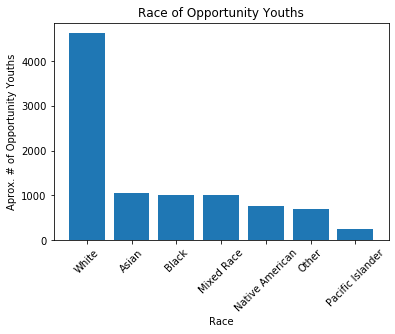

In [135]:
plt.bar(race_list, race_numbers, width = .8)
plt.title('Race of Opportunity Youths')
plt.xlabel('Race')
plt.ylabel('Aprox. # of Opportunity Youths')
plt.xticks(rotation=45)


Text(0, 0.5, 'Aprox. # of Opportunity Youths')

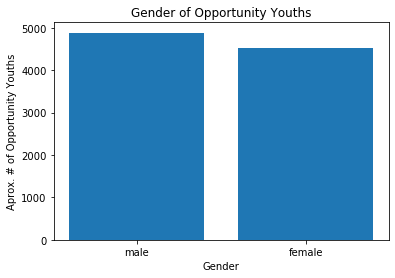

In [126]:
plt.bar(gender_x, gender_list)
plt.title('Gender of Opportunity Youths')
plt.xlabel('Gender')
plt.ylabel('Aprox. # of Opportunity Youths')


In [117]:
df['pwgtp'].sum(axis = 0)

9404.0